# Comprehensive Analysis of our Exploitation+Exploration strategy

1. Comparison between 90%+10% hybrid strategies and 100% DATE
    - DATE(90%)+random(10%)
    - DATE(90%)+BADGE(10%)
    - DATE(90%)+bATE(10%)
    - DATE(90%)+enhanced_bATE(10%)
    - DATE(100%)
    

## 1. Comparison between Hybrid Strategies (by changing Exploration part) and DATE only

In [2]:
import numpy as np
import pandas as pd
import glob 
import csv
import traceback
import datetime
import os
pd.options.display.max_columns=50

In [3]:
results = glob.glob('./results/performances/xgb-result-*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

### Collecting Result Files: Results of Individual Experiments

In [4]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        var = 'norm-revenue'
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean14 = df[var].rolling(window=1).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join(list(df[['data', 'sampling', 'subsamplings']].iloc[0]))
        full_results[info].append(rolling_mean14)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

6


### Mdata Simulation Results

In [7]:
full_results.keys()

dict_keys(['real-m,hybrid,xgb/random', 'real-m,xgb,-', 'real-n,hybrid,xgb/random', 'real-n,xgb,-', 'real-t,hybrid,xgb/random', 'real-t,xgb,-'])

The number of trials for each setting (Results are averaged):
real-m,hybrid,xgb/random 1 0.4587
real-m,xgb,- 1 0.3446


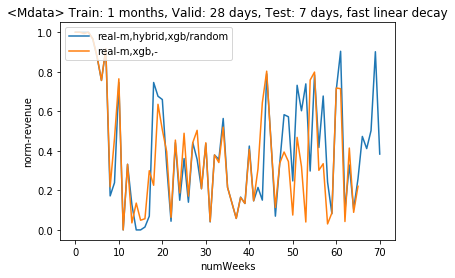

In [8]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-28:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Mdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

### Tdata Simulation Results

The number of trials for each setting (Results are averaged):
real-t,hybrid,xgb/random 1 0.4974
real-t,xgb,- 1 0.5164


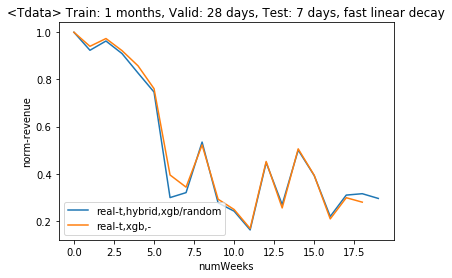

In [9]:
plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    print(key, len(full_results[key]), round(np.mean(avg_result[-28:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Tdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='lower left')
plt.ylabel(var)
plt.xlabel('numWeeks')

plt.show()
plt.close()

### Ndata Simulation Results

The number of trials for each setting (Results are averaged):
real-n,hybrid,xgb/random 1 0.8084
real-n,xgb,- 1 0.8267


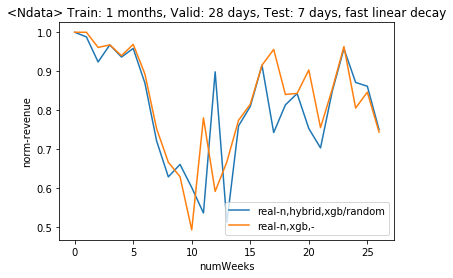

In [10]:
plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    print(key, len(full_results[key]), round(np.mean(avg_result[-28:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)
    
plt.title('<Ndata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.75, 0.85)
plt.show()
plt.close()

# Novel Fraud Analysis

In [80]:
results = glob.glob('./results/performances/fld4-result-*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

In [82]:
# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
summary = []
for i in range(1,num_logs+1):
    rslt = pd.read_csv(list2[-i])
    dic = rslt[['runID','data','sampling','subsamplings','numWeek','current_inspection_rate','test_start','test_end']].iloc[len(rslt)-1].to_dict()
    run_id = round(dic['runID'], 3)
    data = dic['data']
    subsamplings = dic['subsamplings'].replace('/','+')
    strategy = dic['sampling']
    cir = dic['current_inspection_rate']
    summary.append(dic)
summary = pd.DataFrame(summary)

In [83]:
summary.sort_values(['data', 'sampling', 'subsamplings','numWeek'])

,runID,data,sampling,subsamplings,numWeek,current_inspection_rate,test_start,test_end
68,1.602811e+09,real-m,DATE,-,196,10.0,16-10-28,16-11-04
69,1.602955e+09,real-m,DATE,-,196,10.0,16-10-28,16-11-04
70,1.602761e+09,real-m,DATE,-,196,10.0,16-10-28,16-11-04
71,1.602762e+09,real-m,DATE,-,196,10.0,16-10-28,16-11-04
72,1.602955e+09,real-m,DATE,-,196,10.0,16-10-28,16-11-04
...,...,...,...,...,...,...,...,...
78,1.602761e+09,synthetic,hybrid,DATE/random,48,10.0,13-12-27,14-01-03
79,1.602811e+09,synthetic,hybrid,DATE/random,48,10.0,13-12-27,14-01-03
80,1.602762e+09,synthetic,hybrid,DATE/random,48,10.0,13-12-27,14-01-03
81,1.602956e+09,synthetic,hybrid,DATE/random,48,10.0,13-12-27,14-01-03


In [84]:
# Index will be used later
summary[summary.data == 'real-t']

,runID,data,sampling,subsamplings,numWeek,current_inspection_rate,test_start,test_end
0,1.602871e+09,real-t,hybrid,DATE/enhanced_bATE,257,10.0,19-12-29,20-01-05
1,1.602871e+09,real-t,hybrid,DATE/enhanced_bATE,257,10.0,19-12-29,20-01-05
2,1.602870e+09,real-t,hybrid,DATE/enhanced_bATE,257,10.0,19-12-29,20-01-05
3,1.602871e+09,real-t,hybrid,DATE/enhanced_bATE,257,10.0,19-12-29,20-01-05
4,1.602870e+09,real-t,hybrid,DATE/enhanced_bATE,257,10.0,19-12-29,20-01-05
5,1.602762e+09,real-t,hybrid,DATE/random,257,10.0,19-12-29,20-01-05
6,1.602761e+09,real-t,hybrid,DATE/random,257,10.0,19-12-29,20-01-05
7,1.602873e+09,real-t,hybrid,DATE/random,257,10.0,19-12-29,20-01-05
8,1.602871e+09,real-t,hybrid,DATE/random,257,10.0,19-12-29,20-01-05
9,1.602871e+09,real-t,hybrid,DATE/badge,257,10.0,19-12-29,20-01-05


In [81]:
### Previous code

In [ ]:


run_id_saver = [('hybrid', 1602420493.392)]

novelty = {}
num_weeks = 5 # ToDo: to be automatically determined
old_IID = set()

for strategy, run_id in run_id_saver:
    novelty[run_id] = {}
    for week in range(num_weeks):
        filename = f'results/query_indices/{run_id}/{run_id}-{strategy}-5.0-scratch-week-{week}.csv'
        with open(filename, "r") as f:
            reader = csv.reader(f, delimiter=",")
            expid = next(reader)[1]
            dataset = next(reader)[1]
            episode = next(reader)[1]
            start_day = next(reader)[1]
            end_day = next(reader)[1]
            
            start_day = datetime.date(int(start_day[:4]), int(start_day[5:7]), int(start_day[8:10])).strftime('%y-%m-%d')
            end_day = datetime.date(int(end_day[:4]), int(end_day[5:7]), int(end_day[8:10])).strftime('%y-%m-%d')
            
            if week == 0:
                if dataset == 'real-n':
                    df = pd.read_csv('data/ndata.csv')
                elif dataset == 'real-t':
                    df = pd.read_csv('data/tdata.csv')
                elif dataset == 'real-m':
                    df = pd.read_csv('data/mdata.csv')
                elif dataset == 'synthetic':
                    df = pd.read_csv('data/synthetic-imports-declarations.csv')
                
            alldata = df[(df['sgd.date'] < end_day) & (df['sgd.date'] >= start_day)].loc[:, ['illicit', 'revenue', 'importer.id']]
            alldata = alldata[~alldata['importer.id'].isin(old_IID)]
            
            if alldata.empty:
                continue
            
            while True:
                try:
                    indices = next(reader)
                    samp = indices[0]
                    indices = indices[1:]
                    indices = list(map(int, indices))

                    if week == 0:
                        novelty[run_id][f'{samp}-pre'] = []
                        novelty[run_id][f'{samp}-rec'] = []
                        novelty[run_id][f'{samp}-rev'] = []

                    chosen = df.iloc[indices]
                    chosen = chosen[~chosen['importer.id'].isin(old_IID)]
                    
                    # Recall and revenue
                    if chosen.empty:
                        pre = rec = rev = 0
                    else:
                        pre = sum(chosen['illicit'])/chosen['illicit'].count()
                        rec = sum(chosen['illicit'])/sum(alldata['illicit'])
                        rev = sum(chosen['revenue'])/sum(alldata['revenue'])

                    print(f'Week {week}, subsampler {samp}: Precision {round(pre, 4)} Recall {round(rec, 4)}, Revenue {round(rev, 4)}')
                    novelty[run_id][f'{samp}-pre'].append(pre)
                    novelty[run_id][f'{samp}-rec'].append(rec)
                    novelty[run_id][f'{samp}-rev'].append(rev)
                
                    old_IID = old_IID.union(set(alldata['importer.id'].values))
                    
                except StopIteration:
                    break

# Comprehensive Analysis of our Exploitation+Exploration strategy

1. Break the overall performance into exploration / exploitation by looking indices
    - Find which experiment identifier to inspect (One ID for one setting)
    - Compare

In [76]:
def firstCheck(df):
    """ Sorting and indexing necessary for data preparation """
    df = df.dropna(subset=["illicit"])
    df = df.sort_values("sgd.date")
    df = df.reset_index(drop=True)
    return df

dfn = firstCheck(pd.read_csv('data/ndata.csv'))
dft = firstCheck(pd.read_csv('data/tdata.csv'))
dfm = firstCheck(pd.read_csv('data/mdata.csv'))
dfs = firstCheck(pd.read_csv('data/synthetic-imports-declarations.csv'))

KeyboardInterrupt: 

In [ ]:
len(dfs['illicit']), len(dfm['illicit']), len(dfn['illicit']), len(dft['illicit'])

In [ ]:
np.mean(dfs['illicit']), np.mean(dfm['illicit']), np.mean(dfn['illicit']), np.mean(dft['illicit'])

In [5]:
results = glob.glob('./results/performances/fld5-result-*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

In [6]:
# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
summary = []
for i in range(1,num_logs+1):
    rslt = pd.read_csv(list2[-i])
    dic = rslt[['runID','data','sampling','subsamplings','numWeek','current_inspection_rate','test_start','test_end']].iloc[len(rslt)-1].to_dict()
    run_id = round(dic['runID'], 3)
    data = dic['data']
    subsamplings = dic['subsamplings'].replace('/','+')
    strategy = dic['sampling']
    cir = dic['current_inspection_rate']
    summary.append(dic)
summary = pd.DataFrame(summary)

In [7]:
summary.sort_values(['data', 'sampling', 'subsamplings','numWeek'])

,runID,data,sampling,subsamplings,numWeek,current_inspection_rate,test_start,test_end
1,1.602872e+09,real-t,hybrid,DATE/bATE,244,10.0,19-09-29,19-10-06
0,1.602873e+09,real-t,hybrid,DATE/bATE,248,10.0,19-10-27,19-11-03
4,1.602996e+09,real-t,hybrid,DATE/enhanced_bATE,19,10.0,15-06-07,15-06-14
3,1.602996e+09,real-t,hybrid,DATE/enhanced_bATE,23,10.0,15-07-05,15-07-12
2,1.602996e+09,real-t,hybrid,DATE/enhanced_bATE,26,10.0,15-07-26,15-08-02


In [59]:
# Index will be used later
summary[summary.data == 'real-t']

,runID,data,sampling,subsamplings,numWeek,current_inspection_rate,test_start,test_end
0,1.602871e+09,real-t,hybrid,DATE/enhanced_bATE,257,10.0,19-12-29,20-01-05
1,1.602871e+09,real-t,hybrid,DATE/enhanced_bATE,257,10.0,19-12-29,20-01-05
2,1.602870e+09,real-t,hybrid,DATE/enhanced_bATE,257,10.0,19-12-29,20-01-05
3,1.602871e+09,real-t,hybrid,DATE/enhanced_bATE,257,10.0,19-12-29,20-01-05
4,1.602870e+09,real-t,hybrid,DATE/enhanced_bATE,257,10.0,19-12-29,20-01-05
5,1.602762e+09,real-t,hybrid,DATE/random,257,10.0,19-12-29,20-01-05
6,1.602761e+09,real-t,hybrid,DATE/random,257,10.0,19-12-29,20-01-05
7,1.602873e+09,real-t,hybrid,DATE/random,257,10.0,19-12-29,20-01-05
8,1.602871e+09,real-t,hybrid,DATE/random,257,10.0,19-12-29,20-01-05
9,1.602871e+09,real-t,hybrid,DATE/badge,257,10.0,19-12-29,20-01-05


In [ ]:
# Retrieving results
def getSubsamplerResults(exp_a):
    
    run_id = round(exp_a['runID'], 3)
    strategy = exp_a['sampling']
    subsamplings = exp_a['subsamplings'].replace('/','+')
    cir = exp_a['current_inspection_rate']
    week = exp_a['numWeek']
    
    measure_start = 0
    measure_end = week
    results = {}
    
    for week in range(measure_start,measure_end):
        filename = glob.glob(f'results/query_indices/{run_id}-{strategy}-{subsamplings}-*-scratch-week-{week}.csv')[0]
        with open(filename, "r") as f:
            reader = csv.reader(f, delimiter=",")
            expid = next(reader)[1]
            dataset = next(reader)[1]
            episode = next(reader)[1]
            start_day = next(reader)[1]
            end_day = next(reader)[1]

            start_day = datetime.date(int(start_day[:4]), int(start_day[5:7]), int(start_day[8:10])).strftime('%y-%m-%d')
            end_day = datetime.date(int(end_day[:4]), int(end_day[5:7]), int(end_day[8:10])).strftime('%y-%m-%d')

            if week == measure_start:
                if dataset == 'real-n':
                    df = dfn
                elif dataset == 'real-t':
                    df = dft
                elif dataset == 'real-m':
                    df = dfm
                elif dataset == 'synthetic':
                    df = dfs

            alldata = df[(df['sgd.date'] < end_day) & (df['sgd.date'] >= start_day)].loc[:, ['illicit', 'revenue']]

            while True:
                try:
                    indices = next(reader)
                    samp = indices[0]
                    indices = indices[1:]
                    indices = list(map(int, indices))

                    if week == measure_start:
                        results[f'{samp}-pre'] = []
                        results[f'{samp}-rec'] = []
                        results[f'{samp}-rev'] = []

                    chosen = df.iloc[indices].loc[:, ['illicit', 'revenue']]
                    # Recall and revenue
                    if chosen.empty:
                        pre = rec = rev = 0
                    else:
                        try:
                            pre = sum(chosen['illicit'])/chosen['illicit'].count()
                        except:
                            pre = 0
                        try:
                            rec = sum(chosen['illicit'])/sum(alldata['illicit'])
                        except:
                            rec = 0
                        try:
                            rev = sum(chosen['revenue'])/sum(alldata['revenue'])
                        except:
                            rev = 0

                    results[f'{samp}-pre'].append(pre)
                    results[f'{samp}-rec'].append(rec)
                    results[f'{samp}-rev'].append(rev)

                except StopIteration:
                    break
    
    return pd.DataFrame(results)

In [ ]:
exp1, exp2 = 1, 11
rival1 = getSubsamplerResults(summary.loc[exp1])
rival2 = getSubsamplerResults(summary.loc[exp2])

In [ ]:
exp3 = 9
rival3 = getSubsamplerResults(summary.loc[exp3])

In [ ]:
rival1.tail(5)

In [ ]:
rival2.tail(5)

In [ ]:
# Compare DATE performances: Between two experiments
plt.figure()
r1 = rival1['DATE-rev'].rolling(window=14).mean()
r2 = rival2['DATE-rev'].rolling(window=14).mean()
r3 = rival3['DATE-rev'].rolling(window=14).mean()
r4 = rival1['random-rev'].rolling(window=14).mean()
r5 = rival3['badge-rev'].rolling(window=14).mean()
plt.plot(r1.index, r1, label=summary.loc[exp1]['data']+'-'+summary.loc[exp1]['subsamplings'])
plt.plot(r2.index, r2, label=summary.loc[exp2]['data']+'-'+summary.loc[exp2]['subsamplings'])
plt.plot(r3.index, r3, label=summary.loc[exp3]['data']+'-'+summary.loc[exp3]['subsamplings'])
plt.plot(r4.index, r4, label=summary.loc[exp1]['data']+'-'+summary.loc[exp1]['subsamplings'])
plt.plot(r5.index, r5, label=summary.loc[exp3]['data']+'-'+summary.loc[exp3]['subsamplings'])
plt.title('Compare DATE performance between two experiments')
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.show()
plt.close()

In [ ]:
np.mean((rival2['DATE-rev']+rival2['bATE-rev'])-(rival1['DATE-rev']+rival1['random-rev']))

In [ ]:
## Double check

def individualResult(exp_a):
    run_id = round(exp_a['runID'], 3)
    strategy = exp_a['sampling']
    subsamplings = exp_a['subsamplings'].replace('/','+')
    cir = exp_a['current_inspection_rate']
    week = exp_a['numWeek']
    
    path = f'./results/performances/www21-result-{run_id}-{strategy}-{subsamplings}-{cir}.csv'
    df = pd.read_csv(path)
    var = 'revenue'
    rolling_mean7 = df[var].rolling(window=7).mean()
    rolling_mean14 = df[var].rolling(window=14).mean()
    filename = path[path.index('16'):path.index('16')+10]
    info = ','.join(list(df[['data', 'subsamplings']].iloc[0]))
    ### Draw individual figures
    plt.figure()
    plt.title(info+','+filename)
    plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
    plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
    plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
    plt.legend(loc='upper left')
    plt.ylabel(var)
    plt.xlabel('numWeeks')
    plt.show()
    plt.close()
    print(df[var])
    
individualResult(summary.loc[exp2])


In [ ]:
## Double check
rival2['DATE-rev']+rival2['bATE-rev']